In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("/content/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")

# Strip spaces from column names
df.columns = df.columns.str.strip()

# Display info
print("Fixed Columns:", df.columns)
print("Original Shape:", df.shape)
df.head()



Fixed Columns: Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
    

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,166,1,1,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
1,60148,83,1,2,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
2,123,99947,1,1,48,48,48,48,48.0,0.0,...,40,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
3,123,37017,1,1,48,48,48,48,48.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
4,0,111161336,147,0,0,0,0,0,0.0,0.0,...,0,1753752.625,2123197.578,4822992,95,9463032.7,2657727.996,13600000,5700287,BENIGN


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv("/content/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")

# Strip spaces from column names before accessing them
df.columns = df.columns.str.strip()

# Step 1: Convert 'Label' to Target (1 for attack, 0 for BENIGN)
df['Target'] = df['Label'].apply(lambda x: 0 if x.strip() == 'BENIGN' else 1)  # .strip() fixes whitespace
df.drop(['Label'], axis=1, inplace=True)

# Step 2: Replace infinity with NaN, drop NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Step 3: Keep numeric columns and 'Target'
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'Target' not in numeric_cols:
    numeric_cols.append('Target')
df = df[numeric_cols]

# Step 4: Separate and scale features
features = df.drop('Target', axis=1)
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

X = scaled_features
y = df['Target'].values

# Step 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("✅ Preprocessing done.")
print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])
print("Attack samples in test:", np.sum(y_test))


✅ Preprocessing done.
Training samples: 201876
Test samples: 86519
Attack samples in test: 10


In [ ]:
print("Any NaNs?", np.isnan(features).any())
print("Any Infs?", np.isinf(features).any())


Any NaNs? Destination Port               False
Flow Duration                  False
Total Fwd Packets              False
Total Backward Packets         False
Total Length of Fwd Packets    False
                               ...  
Active Min                     False
Idle Mean                      False
Idle Std                       False
Idle Max                       False
Idle Min                       False
Length: 78, dtype: bool
Any Infs? Destination Port               False
Flow Duration                  False
Total Fwd Packets              False
Total Backward Packets         False
Total Length of Fwd Packets    False
                               ...  
Active Min                     False
Idle Mean                      False
Idle Std                       False
Idle Max                       False
Idle Min                       False
Length: 78, dtype: bool


In [ ]:
pip install scikit-learn matplotlib seaborn


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

🔹 Logistic Regression
   Accuracy : 0.9999
   Precision: 0.0000
   Recall   : 0.0000
   Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     86509
           1       0.00      0.00      0.00        10

    accuracy                           1.00     86519
   macro avg       0.50      0.50      0.50     86519
weighted avg       1.00      1.00      1.00     86519



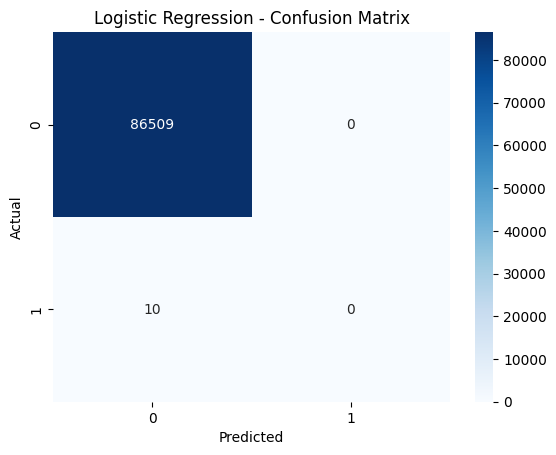

🔹 Random Forest
   Accuracy : 0.9999
   Precision: 1.0000
   Recall   : 0.5000
   Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     86509
           1       1.00      0.50      0.67        10

    accuracy                           1.00     86519
   macro avg       1.00      0.75      0.83     86519
weighted avg       1.00      1.00      1.00     86519



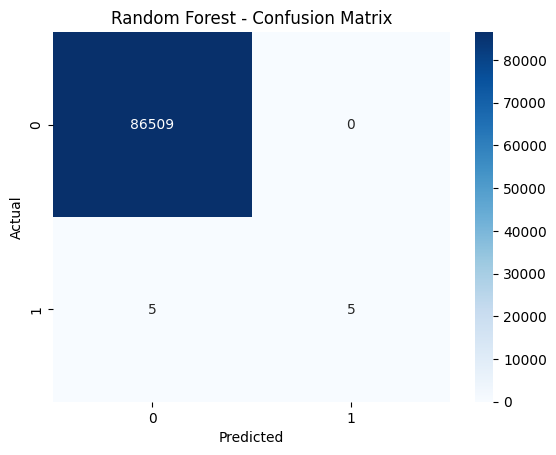

🔹 SVM
   Accuracy : 0.9999
   Precision: 1.0000
   Recall   : 0.1000
   Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     86509
           1       1.00      0.10      0.18        10

    accuracy                           1.00     86519
   macro avg       1.00      0.55      0.59     86519
weighted avg       1.00      1.00      1.00     86519



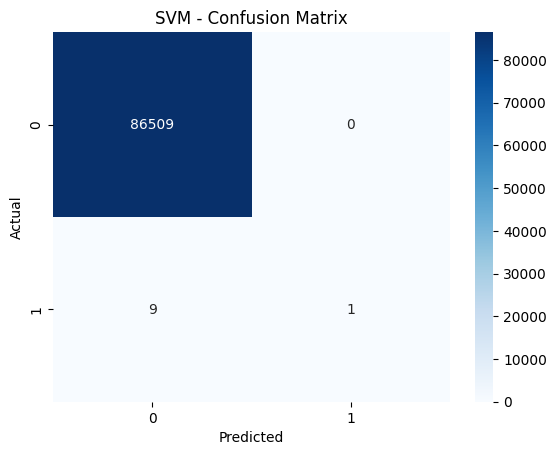

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define classifiers
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC()
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)

    print(f"🔹 {name}")
    print(f"   Accuracy : {acc:.4f}")
    print(f"   Precision: {prec:.4f}")
    print(f"   Recall   : {rec:.4f}")
    print("   Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [ ]:
pip install imbalanced-learn


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training data only
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# Check class balance
print("Before SMOTE:", dict(zip(*np.unique(y_train, return_counts=True))))
print("After SMOTE :", dict(zip(*np.unique(y_resampled, return_counts=True))))


Before SMOTE: {np.int64(0): np.int64(201850), np.int64(1): np.int64(26)}
After SMOTE : {np.int64(0): np.int64(201850), np.int64(1): np.int64(201850)}


Before SMOTE: {np.int64(0): np.int64(201850), np.int64(1): np.int64(26)}
After SMOTE : {np.int64(0): np.int64(201850), np.int64(1): np.int64(201850)}

🔹 Training: Logistic Regression
   Accuracy : 0.9710
   Precision: 0.0036
   Recall   : 0.9000
   Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     86509
           1       0.00      0.90      0.01        10

    accuracy                           0.97     86519
   macro avg       0.50      0.94      0.50     86519
weighted avg       1.00      0.97      0.99     86519



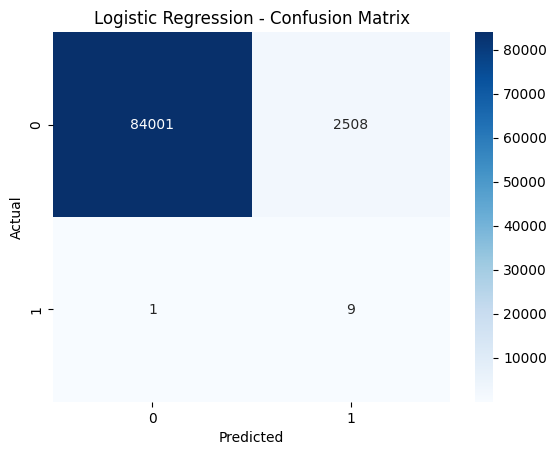


🔹 Training: Random Forest
   Accuracy : 1.0000
   Precision: 1.0000
   Recall   : 0.6000
   Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     86509
           1       1.00      0.60      0.75        10

    accuracy                           1.00     86519
   macro avg       1.00      0.80      0.87     86519
weighted avg       1.00      1.00      1.00     86519



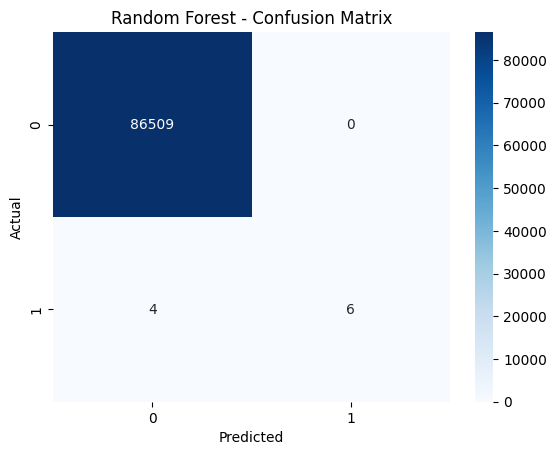


🔹 Training: SVM
   Accuracy : 0.9991
   Precision: 0.1059
   Recall   : 0.9000
   Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     86509
           1       0.11      0.90      0.19        10

    accuracy                           1.00     86519
   macro avg       0.55      0.95      0.59     86519
weighted avg       1.00      1.00      1.00     86519



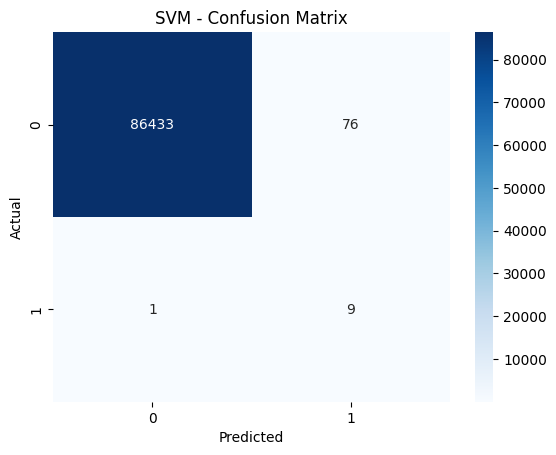

In [ ]:
# Step 1: Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Step 2: Train/Test Split (assuming X and y are already preprocessed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Apply SMOTE to training data
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", dict(zip(*np.unique(y_train, return_counts=True))))
print("After SMOTE :", dict(zip(*np.unique(y_resampled, return_counts=True))))

# Step 4: Define classifiers
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC()
}

# Step 5: Train and evaluate
for name, model in models.items():
    print(f"\n🔹 Training: {name}")

    # Train on balanced data
    model.fit(X_resampled, y_resampled)

    # Predict on original test set
    y_pred = model.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)

    print(f"   Accuracy : {acc:.4f}")
    print(f"   Precision: {prec:.4f}")
    print(f"   Recall   : {rec:.4f}")
    print("   Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [ ]:
!pip install qiskit qiskit-aer qiskit-machine-learning


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.6/231.6 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 4.9 MB/s eta 0:00:00


In [ ]:
!pip install -q "qiskit==0.43.1" "qiskit-aer==0.12.0" "qiskit-machine-learning==0.6.1"


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 93.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 90.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 16.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
jax 0.5

In [ ]:
!pip install numpy==1.26.4 --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 19.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
qiskit-ibmq-provider 0.20.2 requires numpy<1.24, but you have numpy 1.26.4 which is incompatible.


In [ ]:
!pip install -q "qiskit==0.43.1" "qiskit-aer==0.12.0" "qiskit-machine-learning==0.6.1"


In [ ]:
try:
    print("X shape:", X.shape)
    print("y shape:", y.shape)
    print("Sample labels:", np.unique(y, return_counts=True))
except NameError:
    print("X or y is not defined yet.")


X or y is not defined yet.


In [ ]:
print(df.columns)



Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [ ]:
df.columns = df.columns.str.strip()


In [ ]:
df.columns = df.columns.str.strip()


In [ ]:
import numpy as np

In [ ]:
# Replace infinite values with NaN, then drop rows with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load dataset
df = pd.read_csv("/content/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")

# Fix column names
df.columns = df.columns.str.strip()

# Remove inf/-inf and missing values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Separate features and target
X = df.drop("Label", axis=1)
y = df["Label"]

# Encode labels
le = LabelEncoder()
y = le.fit_transform(y)

# Normalize features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Final check
print("✅ Cleaned X shape:", X.shape)
print("✅ Cleaned y distribution:", pd.Series(y).value_counts())


✅ Cleaned X shape: (288395, 78)
✅ Cleaned y distribution: 0    288359
1        36
Name: count, dtype: int64


Quantum Machine Learning

In [ ]:
from sklearn.decomposition import PCA

# Reduce to 2 dimensions for quantum kernel
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Then do train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

print("Reduced X shape:", X_train.shape)



Reduced X shape: (201876, 2)


In [ ]:
# After PCA (X_reduced), do a stratified sample
from sklearn.utils import resample

# Create DataFrame for convenience
df_small = pd.DataFrame(X_reduced, columns=['f1', 'f2'])
df_small['label'] = y

# Sample ~500 records with stratified classes
df_sampled = df_small.groupby('label', group_keys=False).apply(lambda x: x.sample(min(len(x), 250), random_state=42))

# Separate back into X and y
X_small = df_sampled[['f1', 'f2']].values
y_small = df_sampled['label'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, test_size=0.3, random_state=42)

print("🧪 Sampled X shape:", X_train.shape)
print("🎯 Sampled y distribution:", pd.Series(y_train).value_counts())


🧪 Sampled X shape: (200, 2)
🎯 Sampled y distribution: 0    175
1     25
Name: count, dtype: int64


<ipython-input-6-a000581a9b2e>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df_small.groupby('label', group_keys=False).apply(lambda x: x.sample(min(len(x), 250), random_state=42))


In [ ]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_machine_learning.algorithms.classifiers import QSVC
from qiskit_aer import Aer

# Feature map for 2 features
feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')

# Setup quantum kernel using Aer simulator
quantum_kernel = QuantumKernel(feature_map=feature_map, quantum_instance=Aer.get_backend('aer_simulator'))

# QSVC model
qsvc = QSVC(quantum_kernel=quantum_kernel)

# Train on reduced data
qsvc.fit(X_train, y_train)



QSVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', max_iter=-1,
     probability=False,
     quantum_kernel=<qiskit_machine_learning.kernels.quantum_kernel.QuantumKernel object at 0x7a500133bc10>,
     random_state=None, shrinking=True, tol=0.001, verbose=False)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = qsvc.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[74  1]
 [ 4  7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        75
           1       0.88      0.64      0.74        11

    accuracy                           0.94        86
   macro avg       0.91      0.81      0.85        86
weighted avg       0.94      0.94      0.94        86

